In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [142]:
dataframe = pd.read_csv("usuarios_win_mac_lin.csv")
dataframe.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [143]:
dataframe.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [144]:
print(dataframe.groupby('clase').size())

clase
0    86
1    40
2    44
dtype: int64


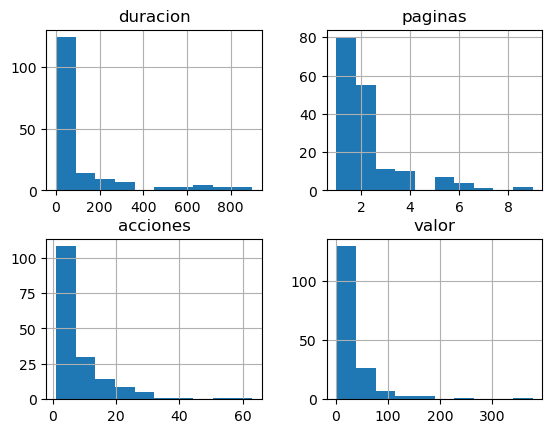

In [145]:
dataframe.drop(['clase'], axis=1).hist()
plt.show()

In [146]:

################## Regresión Logística ##################


In [147]:
X = np.array(dataframe.drop(['clase'],axis=1))
Y = np.array(dataframe['clase'])
X.shape

(170, 4)

In [148]:
model = LogisticRegression(solver='lbfgs', max_iter=3000)
model.fit(X,Y)

LogisticRegression(max_iter=3000)

In [149]:
predictions = model.predict(X)
print(predictions)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 2 2
 2 2 2 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0
 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 2 0 2 1 0 0 0 0 0 0 0 0 0 0 1 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0]


In [150]:
model.score(X,Y)

0.7764705882352941

In [151]:

################## Regresión Lineal ##################


In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 123)

In [153]:
lm = LinearRegression()
lm.fit(X_train, y_train)
# imprimir intercepto y coeficientes
print (lm.intercept_)
print (lm.coef_)

0.8640809723919002
[ 0.00044532  0.16703705 -0.04624213 -0.00251536]


In [176]:
predictions = lm.predict(X_train)
print(predictions)

[ 0.12907088  0.18266942  1.10153072  0.99618092 -0.8365651   0.89720284
  0.92888544  1.13733711  0.82175437  0.6518728   0.93894686  1.06655512
  0.64001804  1.24220258  1.45640992  0.91423863 -0.70200207 -0.25253561
  0.60756732  1.50053607  0.93436147  0.86755118  0.57366896  0.98770435
  0.93391615  1.00224424  0.88264331  0.85245905 -0.34926785  0.86710586
  0.44319     1.06613673  1.16232364  1.10253222  0.81124763  0.88264331
  0.87600212  0.92530154  0.64011038  0.9183787   0.25331549  0.88219799
  1.16321615  0.74281262  0.87057607  0.5855881  -0.02763956  0.91070848
  0.76707553  0.607122    0.21025593  0.91496182  0.77904974  0.55893115
  0.60615626  0.75538939  1.29392784  1.15483673  0.09722414  1.1745734
  0.71373265  0.36534432  0.23442069  1.13102891  0.69864052  0.63695927
  0.71417797  0.99355577  0.69864052  0.72217647  0.75484245  0.72484426
  1.00897272  0.78622423  0.6251748   0.10120956  0.34895516  1.23240188
  0.62428416  1.36449822  0.77463461  0.6981952   0.

In [155]:
lm.score(X_train, y_train)

0.21572509741372403

In [156]:

################## Árboles de decisión y clasificación (CART) ##################


In [166]:
dt = DecisionTreeRegressor(max_depth=2, random_state=42) 
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [179]:
print(dt.predict(X_train))

[0.28333333 0.76666667 1.88888889 1.88888889 0.28333333 0.28333333
 1.88888889 1.45454545 0.28333333 0.76666667 1.88888889 0.76666667
 0.28333333 0.76666667 1.88888889 0.28333333 0.76666667 0.28333333
 0.28333333 1.45454545 1.45454545 0.28333333 0.28333333 1.88888889
 1.88888889 1.45454545 1.88888889 0.28333333 0.28333333 0.28333333
 0.76666667 0.76666667 0.76666667 0.76666667 0.28333333 1.88888889
 0.28333333 0.76666667 0.28333333 0.28333333 0.28333333 1.88888889
 0.76666667 0.28333333 0.28333333 0.28333333 0.28333333 0.76666667
 0.28333333 0.28333333 0.76666667 1.45454545 0.76666667 0.28333333
 0.28333333 0.28333333 1.45454545 1.45454545 0.28333333 0.76666667
 0.28333333 0.76666667 0.28333333 0.76666667 0.28333333 0.76666667
 0.28333333 1.88888889 0.28333333 0.28333333 0.76666667 0.76666667
 0.76666667 0.28333333 0.28333333 0.76666667 0.76666667 0.76666667
 0.28333333 0.76666667 0.76666667 0.28333333 1.88888889 1.88888889
 0.28333333 0.28333333 1.88888889 0.28333333 0.28333333 0.2833

In [180]:
dt.score(X_train, y_train)

0.5111229733229732